Adapted from Stats Wire Youtube: https://www.youtube.com/watch?v=MtiuPH3HUNQ

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mytrainingdata = pd.read_csv('train_data.csv',index_col=0) #set date as index
mytestdata = pd.read_csv('test_data.csv',index_col=0) #set date as index

In [3]:
mytrainingdata.shape
#125 rows and 10 columns

(192, 10)

In [4]:
mytrainingdata.head()

,Max_Demand_GW,Plant_Production_GWh,Imports_GWh,Renewables_Production_GWh,emissions_c02_GG,GDP_bln,Population_k,tmin,tavg,tmax
Date,,,,,,,,,,
2003-01-01,0.36,182.08,0.0,0.0,47.52,4.82,398.58,10.9,13.2,15.6
2003-02-01,0.40,187.10,0.0,0.0,52.80,4.82,398.58,7.9,10.4,13.0
2003-03-01,0.34,176.37,0.0,0.0,44.88,4.82,398.58,9.8,12.7,15.7
2003-04-01,0.30,156.53,0.0,0.0,39.60,4.82,398.58,12.4,15.5,18.7
2003-05-01,0.28,163.97,0.0,0.0,36.96,4.82,398.58,16.0,20.4,24.8


In [5]:
mytrainingdata.tail()

,Max_Demand_GW,Plant_Production_GWh,Imports_GWh,Renewables_Production_GWh,emissions_c02_GG,GDP_bln,Population_k,tmin,tavg,tmax
Date,,,,,,,,,,
2018-08-01,0.46,266.02,52.60,19.66,80.90,12.95,484.63,23.3,26.8,30.9
2018-09-01,0.46,240.45,53.89,16.37,80.90,12.95,484.63,22.0,25.4,29.6
2018-10-01,0.37,207.51,38.52,14.01,65.07,12.95,484.63,18.4,21.3,24.5
2018-11-01,0.35,189.39,25.08,11.73,61.56,12.95,484.63,15.1,18.2,21.3
2018-12-01,0.37,195.04,42.61,12.72,65.07,12.95,484.63,11.5,14.3,17.4


In [6]:
mytrainingdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 2003-01-01 to 2018-12-01
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Max_Demand_GW              192 non-null    float64
 1   Plant_Production_GWh       192 non-null    float64
 2   Imports_GWh                192 non-null    float64
 3   Renewables_Production_GWh  192 non-null    float64
 4   emissions_c02_GG           192 non-null    float64
 5   GDP_bln                    192 non-null    float64
 6   Population_k               192 non-null    float64
 7   tmin                       192 non-null    float64
 8   tavg                       192 non-null    float64
 9   tmax                       192 non-null    float64
dtypes: float64(10)
memory usage: 16.5+ KB


In [7]:
mytrainingdata.describe()

,Max_Demand_GW,Plant_Production_GWh,Imports_GWh,Renewables_Production_GWh,emissions_c02_GG,GDP_bln,Population_k,tmin,tavg,tmax
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.353125,187.730937,21.401302,1.036406,50.636250,7.610000,425.121875,16.189323,19.382812,23.270312
std,0.042224,24.970164,42.986119,4.174785,9.910549,2.471671,24.893584,4.431613,5.312128,5.800390
min,0.270000,152.880000,0.000000,0.000000,32.160000,4.820000,398.580000,7.500000,10.200000,13.000000
25%,0.320000,168.407500,0.000000,0.000000,43.340000,5.692500,406.367500,12.375000,14.300000,17.475000
50%,0.350000,180.805000,0.000000,0.000000,50.250000,6.870000,415.390000,16.000000,18.900000,23.200000
75%,0.380000,200.447500,0.000000,0.000000,55.430000,9.062500,437.182500,19.800000,24.300000,28.500000
max,0.490000,266.020000,145.570000,22.240000,84.060000,12.950000,484.630000,24.000000,28.800000,33.600000


In [8]:
mytrainingdata.isnull()

,Max_Demand_GW,Plant_Production_GWh,Imports_GWh,Renewables_Production_GWh,emissions_c02_GG,GDP_bln,Population_k,tmin,tavg,tmax
Date,,,,,,,,,,
2003-01-01,False,False,False,False,False,False,False,False,False,False
2003-02-01,False,False,False,False,False,False,False,False,False,False
2003-03-01,False,False,False,False,False,False,False,False,False,False
2003-04-01,False,False,False,False,False,False,False,False,False,False
2003-05-01,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2018-08-01,False,False,False,False,False,False,False,False,False,False
2018-09-01,False,False,False,False,False,False,False,False,False,False
2018-10-01,False,False,False,False,False,False,False,False,False,False


In [9]:
mytrainingdata.isnull().sum() 
#shows the sum of null values in each column

Max_Demand_GW                0
Plant_Production_GWh         0
Imports_GWh                  0
Renewables_Production_GWh    0
emissions_c02_GG             0
GDP_bln                      0
Population_k                 0
tmin                         0
tavg                         0
tmax                         0
dtype: int64

In [10]:
mytrainingdata.dropna(inplace=True) 
#drop null values

In [11]:
mytrainingdata.isnull().sum().sum()
#shows the number of null values in the whole dataframe

0

In [12]:
#drop a column

#df.drop(["datetime"],axis=1,inplace=True)

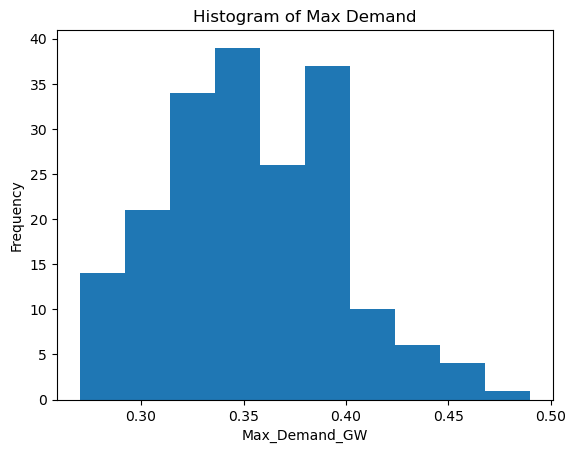

In [13]:
plt.hist(mytrainingdata["Max_Demand_GW"])
plt.xlabel("Max_Demand_GW")
plt.ylabel("Frequency")
plt.title("Histogram of Max Demand")
plt.show()

In [14]:
max_demand_min_value = mytrainingdata["Max_Demand_GW"].min()
max_demand_max_value = mytrainingdata["Max_Demand_GW"].max()
print("Minimum value in Max_Demand_GW column:", max_demand_min_value)
print("Maximum value in Max_Demand_GW column:", max_demand_max_value)
#This confirms that the histogram values
#From the histogram we can observe that 0.30-0.35 is the most frequency demand in the period
#Min demand was 0.27 and max demand was 0.49

#ASKED CHATGPT HOW TO GET THE DATES

#We can get the dates when these occurred
max_demand_max_date = mytrainingdata["Max_Demand_GW"].idxmax()
print("Date of maximum value in Max_Demand_GW column:", max_demand_max_date)
max_demand_min_date = mytrainingdata["Max_Demand_GW"].idxmin()
print("Date of minimum value in Max_Demand_GW column:", max_demand_min_date)

#Unsurprisingly the max demand occurred more recently and the minimum occurred very long ago

Minimum value in Max_Demand_GW column: 0.27
Maximum value in Max_Demand_GW column: 0.49
Date of maximum value in Max_Demand_GW column: 2017-08-01
Date of minimum value in Max_Demand_GW column: 2010-04-01


In [15]:
#Split the dataframe into X and y
#X = mytrainingdata.iloc[:,:-1] #all rows, all columns except the last column which is the target column
#y = mytrainingdata.iloc[:, -1] #all rows, last column which is the target column
#X: This contains all the features (independent variables) except the last column, which is typically the target variable or the column you want to predict.
#y: This contains only the last column, which is often the target variable you want to predict.

#X represents the input features
X_train = mytrainingdata.drop(['Max_Demand_GW','Plant_Production_GWh'],axis = 1)
X_train.shape

(192, 8)

In [16]:
#y represents the target variable to be predicted
y_train = mytrainingdata['Max_Demand_GW']
y_train.shape

(192,)

In [17]:
X_test = mytestdata.drop(['Max_Demand_GW','Plant_Production_GWh'],axis = 1)
X_test.shape

(48, 8)

In [18]:
y_test = mytestdata['Max_Demand_GW']
y_test.shape

(48,)

#function from scikit-learn (sklearn) to split your dataset into training and testing sets. 
#wasn't needed as it had already been split


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=99)





In [19]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(criterion="absolute_error",
                            splitter="best",
                           max_depth=10,
                           min_samples_split=10,
                           random_state=5)

In [20]:
#Fitting the decision tree model to the training data
reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=10,
                      min_samples_split=10, random_state=5)

In [21]:
y_pred = reg.predict(X_test)

# This line uses the trained decision tree model to make predictions on the test data (X_test). The predicted values are stored in the variable y_pred.

In [22]:
y_pred

array([0.41 , 0.41 , 0.37 , 0.34 , 0.34 , 0.46 , 0.46 , 0.46 , 0.41 ,
       0.375, 0.34 , 0.34 , 0.41 , 0.41 , 0.37 , 0.34 , 0.375, 0.375,
       0.46 , 0.46 , 0.41 , 0.375, 0.34 , 0.34 , 0.37 , 0.37 , 0.37 ,
       0.32 , 0.375, 0.46 , 0.46 , 0.46 , 0.41 , 0.34 , 0.34 , 0.37 ,
       0.37 , 0.37 , 0.37 , 0.32 , 0.34 , 0.37 , 0.46 , 0.46 , 0.41 ,
       0.375, 0.31 , 0.32 ])

In [23]:
y_test

Date
2019-01-01    0.44
2019-02-01    0.43
2019-03-01    0.39
2019-04-01    0.36
2019-05-01    0.33
2019-06-01    0.45
2019-07-01    0.50
2019-08-01    0.48
2019-09-01    0.43
2019-10-01    0.39
2019-11-01    0.37
2019-12-01    0.39
2020-01-01    0.44
2020-02-01    0.41
2020-03-01    0.40
2020-04-01    0.35
2020-05-01    0.32
2020-06-01    0.39
2020-07-01    0.46
2020-08-01    0.48
2020-09-01    0.45
2020-10-01    0.44
2020-11-01    0.35
2020-12-01    0.38
2021-01-01    0.42
2021-02-01    0.43
2021-03-01    0.40
2021-04-01    0.34
2021-05-01    0.32
2021-06-01    0.54
2021-07-01    0.53
2021-08-01    0.56
2021-09-01    0.48
2021-10-01    0.42
2021-11-01    0.40
2021-12-01    0.43
2022-01-01    0.50
2022-02-01    0.47
2022-03-01    0.46
2022-04-01    0.37
2022-05-01    0.42
2022-06-01    0.54
2022-07-01    0.58
2022-08-01    0.57
2022-09-01    0.53
2022-10-01    0.41
2022-11-01    0.41
2022-12-01    0.40
Name: Max_Demand_GW, dtype: float64

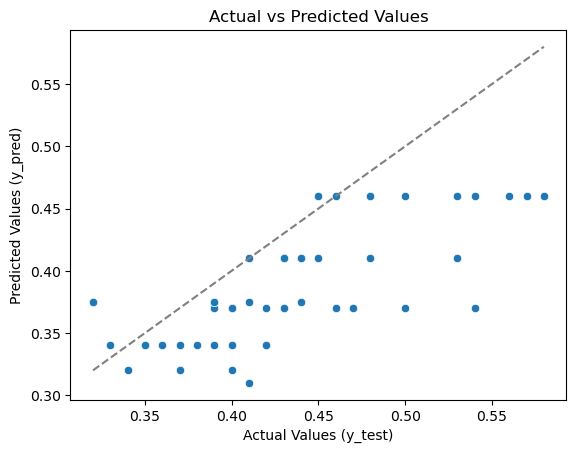

In [24]:
# Convert y_pred to a Pandas Series with the same DateTime index as y_test
y_pred_series = pd.Series(y_pred, index=y_test.index)

# Create a DataFrame with y_test and y_pred_series
results_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred_series})

# Scatter plot using Seaborn
sns.scatterplot(data=results_df, x='y_test', y='y_pred')

# Add a diagonal line for reference (y_test = y_pred)
plt.plot([min(results_df['y_test']), max(results_df['y_test'])],
         [min(results_df['y_test']), max(results_df['y_test'])],
         linestyle='--', color='gray')

# Set plot labels and title
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')

# Show the plot
plt.show()

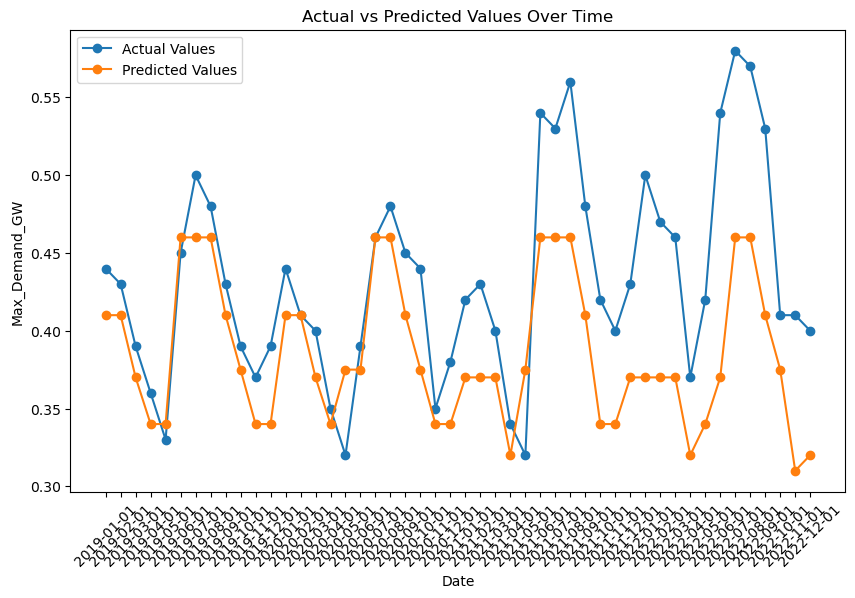

In [25]:
import matplotlib.pyplot as plt

# Plotting y_test and y_pred against date
plt.figure(figsize=(10, 6))

# Plotting y_test
plt.plot(y_test.index, y_test, label='Actual Values', marker='o')

# Plotting y_pred
plt.plot(y_test.index, y_pred, label='Predicted Values', marker='o')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Max_Demand_GW')
plt.title('Actual vs Predicted Values Over Time')

# Adding a legend
plt.legend()

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [26]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

#Taking the square root of Mean Squared Error (MSE) gives you the Root Mean Squared Error (RMSE). The primary reason to use RMSE instead of MSE is that it has the same scale as the original target variable, making it more interpretable and easier to relate to the actual values of the variable.

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)

# Display the results
print(f'R-squared: {r2:.4f} (Ideal: 1)')
print(f'Mean Absolute Error: {mae:.4f} (Ideal: 0)')
print(f'Mean Squared Error: {mse:.4f} (Ideal: 0)')
print(f'Root Mean Squared Error: {rmse:.4f} (Ideal: 0)')
print(f'Explained Variance Score: {explained_variance:.4f} (Ideal: 1)')


R-squared: 0.0143 (Ideal: 1)
Mean Absolute Error: 0.0525 (Ideal: 0)
Mean Squared Error: 0.0042 (Ideal: 0)
Root Mean Squared Error: 0.0650 (Ideal: 0)
Explained Variance Score: 0.5311 (Ideal: 1)


Cross-validation is a resampling technique that helps assess how well a model generalizes to an independent dataset.
The number of folds in the cross-validation. In this case, it's set to 10, meaning the dataset is divided into 10 subsets, and the model is trained and evaluated 10 times, each time using a different subset as the test set.
he cross_val_score function returns an array of scores, where each score corresponds to the performance of the model on one of the cross-validated folds.

The purpose of using cross-validation is to get a more robust estimate of the model's performance by training and evaluating it multiple times on different subsets of the training data. This helps to identify potential issues such as overfitting or underfitting and provides a more reliable estimate of the model's generalization performance.

In the context of regression, the scores typically represent metrics such as the R-squared value or the mean squared error for each fold. You can use these scores to assess the model's performance and potentially tune hyperparameters or make decisions about the model's suitability for your task.

In [27]:
from sklearn.model_selection import cross_val_score
print("R SQUARED CV")
cross_val_score(reg,X_train,y_train,cv=10)

R SQUARED CV


array([0.5907208 , 0.59741263, 0.48789325, 0.57658023, 0.69561551,
       0.7936312 , 0.13178066, 0.45673653, 0.24668215, 0.11924829])

The array of numbers you obtained from the cross_val_score represents the performance scores of your regression model for each fold in a 10-fold cross-validation. The specific metric used for scoring depends on the default scoring method for the specific regression model you're using (in this case, reg).

The default scoring method for regression tasks in scikit-learn's DecisionTreeRegressor is the coefficient of determination (R-squared), and it is equivalent to setting scoring=None. Therefore, when you use cross_val_score with a DecisionTreeRegressor without specifying the scoring parameter, it calculates the R-squared values by default.


In [28]:
print("MSE")
scores = cross_val_score(reg,X_train,y_train,cv=10,scoring='neg_mean_squared_error')

# Negate the scores to get the positive MSE values
positive_mse_scores = -scores
positive_mse_scores

MSE


array([0.0006175 , 0.00052125, 0.00080263, 0.00057895, 0.0005    ,
       0.00046316, 0.00081579, 0.00075395, 0.00062895, 0.00214211])

The negative sign is used because scikit-learn conventionally considers scoring functions where higher values are better. For metrics like MSE, which are better when lower, the negation is applied to align with this convention.

In [29]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Create the grid search object
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=5),
                           param_grid,
                           cv=10,  # Use the same number of folds as in cross_val_score
                           scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a new model with the best hyperparameters
best_reg = DecisionTreeRegressor(random_state=5, **best_params)
best_reg.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=15, min_samples_split=5, random_state=5)

In [30]:
y_pred = best_reg.predict(X_test)

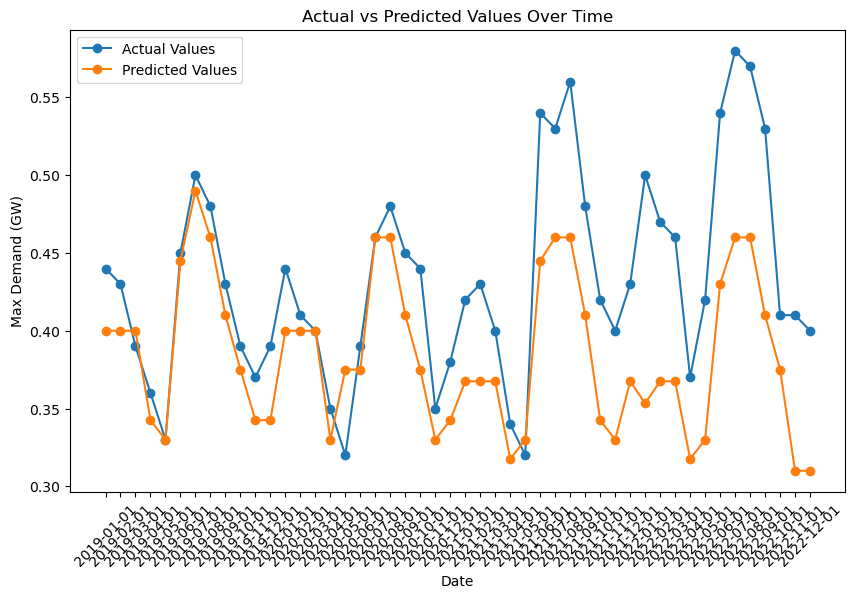

In [31]:
import matplotlib.pyplot as plt

# Plotting y_test and y_pred against date
plt.figure(figsize=(10, 6))

# Plotting y_test
plt.plot(y_test.index, y_test, label='Actual Values', marker='o')

# Plotting y_pred
plt.plot(y_test.index, y_pred, label='Predicted Values', marker='o')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Max Demand (GW)')
plt.title('Actual vs Predicted Values Over Time')

# Adding a legend
plt.legend()

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [32]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

# Calculate R-squared
r2b = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error
maeb = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error
mseb = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmseb = np.sqrt(mse)

#Taking the square root of Mean Squared Error (MSE) gives you the Root Mean Squared Error (RMSE). The primary reason to use RMSE instead of MSE is that it has the same scale as the original target variable, making it more interpretable and easier to relate to the actual values of the variable.

# Calculate Explained Variance Score
explained_varianceb = explained_variance_score(y_test, y_pred)

# Display the results
print(f'R-squared: {r2:.4f} (Ideal: 1)')
print(f'New R-squared: {r2b:.4f} (Ideal: 1) \n')
print(f'Mean Absolute Error: {mae:.4f} (Ideal: 0)')
print(f'New Mean Absolute Error: {maeb:.4f} (Ideal: 0) \n')
print(f'Mean Squared Error: {mse:.4f} (Ideal: 0)')
print(f'New Mean Squared Error: {mseb:.4f} (Ideal: 0) \n')
print(f'Root Mean Squared Error: {rmse:.4f} (Ideal: 0)')
print(f'New Root Mean Squared Error: {rmseb:.4f} (Ideal: 0) \n')
print(f'Explained Variance Score: {explained_variance:.4f} (Ideal: 1)')
print(f'New Explained Variance Score: {explained_varianceb:.4f} (Ideal: 1)')


R-squared: 0.0143 (Ideal: 1)
New R-squared: 0.0473 (Ideal: 1) 

Mean Absolute Error: 0.0525 (Ideal: 0)
New Mean Absolute Error: 0.0512 (Ideal: 0) 

Mean Squared Error: 0.0042 (Ideal: 0)
New Mean Squared Error: 0.0041 (Ideal: 0) 

Root Mean Squared Error: 0.0650 (Ideal: 0)
New Root Mean Squared Error: 0.0650 (Ideal: 0) 

Explained Variance Score: 0.5311 (Ideal: 1)
New Explained Variance Score: 0.5868 (Ideal: 1)


This actually performed worse!!!! - ACTUALLY NOW BETTER. COMMENT

There are several reasons why the results from hyperparameter tuning might be worse than your initial results:

1. **Parameter Grid:**
   - The chosen hyperparameter grid might not cover the optimal values for your specific problem. Adjust the range and values in the parameter grid to ensure that you are exploring a diverse set of hyperparameters.

2. **Overfitting on Training Set:**
   - If you are not careful, hyperparameter tuning on the training set within each fold of cross-validation may lead to overfitting to the training data. The model might end up capturing noise specific to the training subsets rather than learning general patterns. Consider using a holdout validation set for hyperparameter tuning or employing nested cross-validation.

3. **Model Complexity:**
   - Increasing the complexity of the model (e.g., increasing `max_depth` in a decision tree) may lead to overfitting, especially if the dataset is not large enough to support a more complex model.

4. **Randomness:**
   - Some models, especially those with random components like Random Forests, might yield different results due to randomness. Ensure that you set random seeds (`random_state`) consistently for reproducibility.

5. **Limited Data:**
   - If your dataset is small, there might not be enough information to robustly estimate the optimal hyperparameters. In such cases, regularization and simpler models might be more suitable.

To troubleshoot and potentially improve results:

- Experiment with a wider range of hyperparameters.
- Ensure a consistent random seed for reproducibility.
- Check if there is overfitting to the training set within each fold of cross-validation.
- Consider model simplicity and regularization.

It's also worth noting that improvement is not guaranteed with hyperparameter tuning, and sometimes the initial default parameters may perform well. Always interpret the results in the context of your specific problem and dataset characteristics.

FEATURE IMPORTANCES

In [33]:
#FOR original reg

f_list = list(X_train.columns)
f_importance = pd.Series(reg.feature_importances_,index = f_list).sort_values(ascending = False)
print(f_importance)

tavg                         0.628846
emissions_c02_GG             0.196154
tmax                         0.067308
GDP_bln                      0.036538
tmin                         0.036538
Population_k                 0.032692
Imports_GWh                  0.001923
Renewables_Production_GWh    0.000000
dtype: float64


In [34]:
#FOR best reg

f_list = list(X_train.columns)
f_importance = pd.Series(best_reg.feature_importances_,index = f_list).sort_values(ascending = False)
print(f_importance)

tavg                         0.722764
emissions_c02_GG             0.180269
tmax                         0.035713
Population_k                 0.028875
GDP_bln                      0.016051
tmin                         0.013817
Renewables_Production_GWh    0.002510
Imports_GWh                  0.000000
dtype: float64


Decision Tree Regression
Adapted from https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

# Import the necessary modules and libraries
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

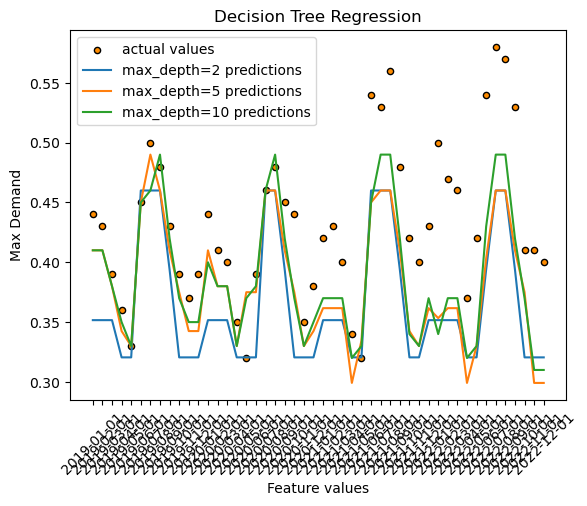

In [35]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2, random_state=30)
regr_2 = DecisionTreeRegressor(max_depth=5, random_state=30)
regr_3 = DecisionTreeRegressor(max_depth=1000, random_state=30)


regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
regr_3.fit(X_train, y_train)

# Predict
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(y_test.index, y_test, s=20, edgecolor="black", c="darkorange", label="actual values")
#plt.scatter(y_test.index, y_1, s=20, edgecolor="black", c="cornflowerblue", label="max_depth=2 predictions")
#plt.scatter(y_test.index, y_2, s=20, edgecolor="black", c="yellowgreen", label="max_depth=5 predictions")

plt.plot(y_test.index, y_1, label="max_depth=2 predictions")
plt.plot(y_test.index, y_2, label="max_depth=5 predictions")
plt.plot(y_test.index, y_3, label="max_depth=10 predictions")

plt.xlabel("Feature values")
plt.ylabel("Max Demand")
plt.title("Decision Tree Regression")
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


The ideal depth for a Decision Tree depends on the specific characteristics of your dataset and the goals of your modeling task. The depth of a Decision Tree refers to the maximum depth from the root node to the leaves. A shallow tree (low depth) may underfit the data, while a deep tree (high depth) may overfit.

Here are some general guidelines for choosing the depth of a Decision Tree:

1. **Underfitting (Low Depth):**
   - A tree with too low a depth may not capture the complexity of the underlying patterns in the data.
   - It may result in a model that is too simple and does not perform well on both the training and test datasets.

2. **Balanced Model (Moderate Depth):**
   - A moderate depth that is neither too shallow nor too deep is often a good starting point.
   - It allows the model to capture important patterns in the data without overfitting.

3. **Overfitting (High Depth):**
   - A tree with a high depth may fit the training data very closely, capturing noise in the data.
   - While it might perform very well on the training data, it may generalize poorly to new, unseen data.

4. **Model Complexity and Interpretability:**
   - Consider the trade-off between model complexity and interpretability.
   - A shallower tree is easier to interpret, while a deeper tree may be more complex and harder to interpret.

5. **Cross-Validation:**
   - Use techniques like cross-validation to find the optimal hyperparameters, including the tree depth.
   - Evaluate the model's performance on validation data to avoid overfitting.

You can experiment with different depths and evaluate the model's performance on a validation set or through cross-validation. Tools like grid search or random search can help automate the process of finding optimal hyperparameters.

It's important to note that the ideal depth is problem-specific, and what works well for one dataset may not be optimal for another. It's recommended to experiment and tune hyperparameters based on the characteristics of your data and the specific requirements of your modeling task.

FIND THE IDEAL DEPTH

# Cross Validation

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from numpy import absolute

# Training model cross-validation
score_train_decision_tree = cross_val_score(reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

print("Cross-validation scores for Decision Tree on training data:")
print(score_train_decision_tree)

# The absolute mean score
print("Mean Absolute Cross-validation Score on training data:", absolute(np.mean(score_train_decision_tree)))

# Testing model cross-validation
score_test_decision_tree = cross_val_score(reg, X_test, y_test, scoring='neg_mean_squared_error', cv=10)

print("\nCross-validation scores for Decision Tree on test data:")
print(score_test_decision_tree)
print("Mean Absolute Cross-validation Score on test data:", absolute(np.mean(score_test_decision_tree)))

Cross-validation scores for Decision Tree on training data:
[-0.000735   -0.00067    -0.00073684 -0.00068421 -0.00063158 -0.00039474
 -0.00026316 -0.00071579 -0.00065263 -0.00120526]
Mean Absolute Cross-validation Score on training data: 0.0006689210526315785

Cross-validation scores for Decision Tree on test data:
[-0.00174  -0.00036  -0.00018  -0.00468  -0.00042  -0.0027   -0.0032
 -0.0018   -0.002525 -0.0022  ]
Mean Absolute Cross-validation Score on test data: 0.0019804999999999996


# Hyperparameter Tuning

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['squared_error', 'poisson', 'absolute_error', 'friedman_mse'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, 15, 20, None],  # None allows unlimited depth
    'min_samples_split': [2, 5, 10, 15],
    'random_state': [5]
}


# Create the decision tree regressor
reg = DecisionTreeRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred_best = best_model.predict(X_test)

Best Hyperparameters: {'criterion': 'friedman_mse', 'max_depth': 5, 'min_samples_split': 5, 'random_state': 5, 'splitter': 'best'}


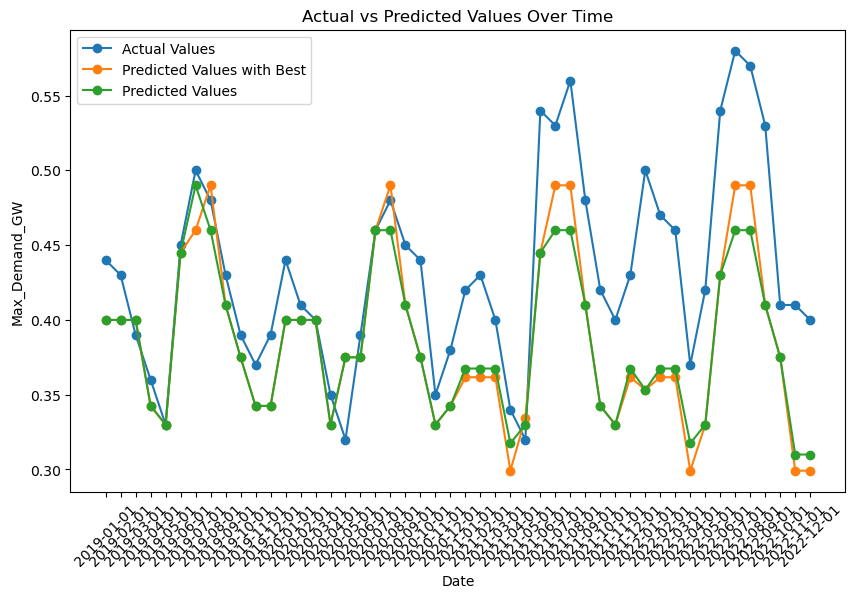

In [37]:
import matplotlib.pyplot as plt

# Plotting y_test and y_pred against date
plt.figure(figsize=(10, 6))

# Plotting y_test
plt.plot(y_test.index, y_test, label='Actual Values', marker='o')

# Plotting y_pred
plt.plot(y_test.index, y_pred_best, label='Predicted Values with Best', marker='o')

plt.plot(y_test.index, y_pred, label='Predicted Values', marker='o')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Max_Demand_GW')
plt.title('Actual vs Predicted Values Over Time')

# Adding a legend
plt.legend()

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [39]:

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

#Taking the square root of Mean Squared Error (MSE) gives you the Root Mean Squared Error (RMSE). The primary reason to use RMSE instead of MSE is that it has the same scale as the original target variable, making it more interpretable and easier to relate to the actual values of the variable.

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)




# Calculate R-squared
r2b = r2_score(y_test, y_pred_best)

# Calculate Mean Absolute Error
maeb = mean_absolute_error(y_test, y_pred_best)

# Calculate Mean Squared Error
mseb = mean_squared_error(y_test, y_pred_best)

# Calculate Root Mean Squared Error
rmseb = np.sqrt(mse)

#Taking the square root of Mean Squared Error (MSE) gives you the Root Mean Squared Error (RMSE). The primary reason to use RMSE instead of MSE is that it has the same scale as the original target variable, making it more interpretable and easier to relate to the actual values of the variable.

# Calculate Explained Variance Score
explained_varianceb = explained_variance_score(y_test, y_pred_best)



# Display the results
print(f'R-squared: {r2:.4f} (Ideal: 1)')
print(f'New R-squared: {r2b:.4f} (Ideal: 1) \n')
print(f'Mean Absolute Error: {mae:.4f} (Ideal: 0)')
print(f'New Mean Absolute Error: {maeb:.4f} (Ideal: 0) \n')
print(f'Mean Squared Error: {mse:.4f} (Ideal: 0)')
print(f'New Mean Squared Error: {mseb:.4f} (Ideal: 0) \n')
print(f'Root Mean Squared Error: {rmse:.4f} (Ideal: 0)')
print(f'New Root Mean Squared Error: {rmseb:.4f} (Ideal: 0) \n')
print(f'Explained Variance Score: {explained_variance:.4f} (Ideal: 1)')
print(f'New Explained Variance Score: {explained_varianceb:.4f} (Ideal: 1)')

R-squared: 0.0473 (Ideal: 1)
New R-squared: 0.0798 (Ideal: 1) 

Mean Absolute Error: 0.0512 (Ideal: 0)
New Mean Absolute Error: 0.0510 (Ideal: 0) 

Mean Squared Error: 0.0041 (Ideal: 0)
New Mean Squared Error: 0.0039 (Ideal: 0) 

Root Mean Squared Error: 0.0639 (Ideal: 0)
New Root Mean Squared Error: 0.0639 (Ideal: 0) 

Explained Variance Score: 0.5868 (Ideal: 1)
New Explained Variance Score: 0.5911 (Ideal: 1)
